# **데이터 크롤링**

## **크롤링이란?**
> 크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램  
'웹 크롤링'(web crawling)??  
'데이터 크롤링'(data crawling)!!  

우리는 매일 크롤러도 사용하고 있습니다.

## **웹 크롤링**
> 웹 서비스 내 정보를 수집하는 일  
다만 서비스 제공자의 입장에서는??  

>> 필요한 정보가 있다면?  
API 확인 -> 없으면 직접 크롤링  

### 웹 서핑을 하는 의식의 흐름
> - 브라우저 오픈  
> - 원하는 인터넷페이지 주소 입력  
> - 화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기  
> - 문자, 그림, 동영상 조회  

### 웹 크롤링 하는 의식의 흐름
> - 정보를 가져오고자 하는 url 정의
> - url 정보로 requests로 정보 요청
> - text 정보를 html로 변환
> - html에서 우리가 필요한 정보만 선별

## requests
> - HTTP 요청을 주고받기 위한 파이썬 패키지
> - 파이썬 내장 패키지는 아니지만 사실상 HTTP 요청을 주고받기 위한 표준이라 생각해도 무방함
> - 웹 페이지에 요청, 업데이트, 삭제 등 인터넷프로토콜을 파이썬으로 제어한다.
> - requests는 요청을 하고 데이터를 전달 받지만 text 혹은 바이너리 형태로만 전달받음.

## BeautifulSoup
> - API는 통신을 위해 정형화 된 데이터 형태의 text, json등을 통신에 사용한다.  
> - requests로 전달받은 데이터를 우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환  
> - text를 html로 변환하는 모듈이 beautifulSoup

### BeautifulSoup 설치

In [1]:
# 패키지 설치 및 import 
# pip install BeautifulSoup4
from bs4 import BeautifulSoup

## 간단한 데이터 크롤링으로 기본 개념잡기

In [2]:
# 필요패키지 import
import time
import json
import urllib
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 네이버 메인페이지 크롤링

In [3]:
'''
정보를 가져오고자 하는 url 정의
url 정보로 requests로 정보 요청
text 정보를 html로 변환
html에서 우리가 필요한 정보만 선별
'''
# url정의
url = 'https://www.naver.com/'
# requsts로 url에 정보요청
resp = requests.get(url) # url페이지에 정보요청을 하고 내려받은 데이터를 resp 변수에 저장
# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')
# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

ConnectionError: HTTPSConnectionPool(host='www.naver.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000020D10399160>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
html.select('span.item')

#### 실제 개발자가 작성한 코드로 확인된다
> 정제되지 않은 데이터로 가독성이 좋지 않음  
우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.  
그러기에 html의 기본 구성을 살펴보도록 하겠습니다.  

In [ ]:
html

#### 웹 페이지의 구성
> **HTML(Hyper Text Markup Language)**  
www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

> **<태그>** 내용 **</태그>**  
<tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

> 형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)  
웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
> 용도 : html에서 내가 원하는 내용을 찾아내기 위해서  
<span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 단일 셀렉터 html.select('span')
>> <span class="news" id="1234">현대모비스 뉴스1</span>  
<span class="product" id="1235">현대모비스 뉴스2</span>  

> 클래스 포함 셀렉터 html.select('span.news')  
>> <span class="news" id="1234">현대모비스 뉴스1</span>  

> id 포함 셀렉터 html.select('span#1235')  
>> <span class="product" id="1235">현대모비스 뉴스2</span>  

#### 복합 셀렉터
<span>1</span>  
<span class="txt">2</span>  
<em class="txt">3</em>  

> 태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt  
> em 태그 중에서 class가 txt 인 라인을 찾고 싶다. : em.txt  

#### 경로 셀렉터
<ul>
    <li><span>이걸 찾으려면?</span></li>
</ul>
<span>이건 아님</span>

> ul 태그안 li 태그 안 span 라인을 찾는다  
ul > li > span 혹은 ul li span

In [ ]:
html.select('strong.title') # title elss

### 다음 뉴스페이지 뉴스 헤더 크롤링

In [ ]:
# 다음 뉴스 페이지 크롤링
# url정의
url = 'https://news.daum.net/'
# requsts로 url에 정보요청
resp = requests.get(url)
# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')
# html 내에서 뉴스헤더 선별
for item in html.select('a.link_txt')[:-13]:
    print(item.text.strip())

## 패턴 URL 크롤링
앞으로는 패턴을 순환하는 크롤링이 진행이 되는데 서비스 제공자가 이를 감지하고 기계적인 접속을 차단하는 경우가 많습니다.  
이를 해결하기 위한 여러가지 방법을 소개합니다.

In [ ]:
resp

In [ ]:
# requests 요청 객체의 상태코드
resp.status_code

In [ ]:
# HTTP 요청 시 상태코드 확인
requests.codes.

In [ ]:
resp.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

# 크롤링 시 문제가 없을 경우에만 진행
if resp.status_code == requests.codes.ok:
    # 크롤링 코드 진행
elif resp.status_code == requests.codes.NOT_FOUND:
    # 경고메세지 출력 등등등

In [ ]:
# 차단막는 코드
# 난수 생성 후 요청 작업에 시간차를 둠
for i in range(10):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print(i)

### 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기

In [ ]:
# 다음에서 로또번호 혹은 로또로 검색해서 표시되는 로또번호 크롤링 해오기
url = 'https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EB%A1%9C%EB%98%90'

# requsts로 url에 정보요청
resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')

# 필요정보 선별
for ball in html.select('span.ball')[:6]:
    print(ball.text)

### 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다 (10페이지)

In [ ]:
# url 설정 (페이지 넘어가는 url 설정을 어떻게 할건지?)
# 순환시키면서 저 requests 요청을 어떻게 컨트롤 할 건지?
total_lotto = []
for page in range(1, 10):
    
    lotto_list = []
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print(f'{page}페이지 크롤링 중입니다.') 
    # url 설정
    url = f'https://search.daum.net/search?w=tot&D A=LOT&rtmaxcoll=LOT&&q={page}회차%20로또'
    print(f'{page}페이지 크롤링 중입니다.') 

    # requests로 데이터 요청하기
    resp = requests.get(url)

    # html로 변환
    html = BeautifulSoup(resp.text, 'html.parser')

    # 데이터 선별
    for ball in html.select('span.ball')[:6]:
        total_lotto.append(ball.text)
        
lotto_array = np.array(total_lotto).reshape(-1, 6)

print('크롤링 완료!')

In [ ]:
lotto_array

In [ ]:
# 데이터 시각화까지
plt.figure(figsize=(12, 6))
sns.countplot(lotto_array.flatten())
plt.show()

In [ ]:
lotto_array.shape

In [ ]:
# 데이터프레임으로 저장
df = pd.DataFrame(lotto_array,
                 index=[f'{i}회차' for i in range(1, 9)])
df

### 네이버 키워드로 검색한 결과를 크롤링

In [ ]:
content_list = ['이상한+변호사+우영우', '탑건', '닥터스트레인지', '범죄도시']

In [ ]:
# url 정의
for keyword in content_list:
    
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    # print(f'{page}페이지 크롤링 중입니다.') 
    url = f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={keyword}'

# requsts로 url에 정보요청
    resp = requests.get(url)

# 정보를 html 변환 (보기 쉽게)
    html = BeautifulSoup(resp.text, 'html.parser')

# 정보선별
    print(keyword, html.select('span.desc')[0].text)

## 크롤링 결과에서 html 속성 접근

In [ ]:
url = 'https://news.daum.net/'
# requsts로 url에 정보요청
resp = requests.get(url)
# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(resp.text, 'html.parser')
# html 내에서 뉴스헤더 선별
# for item in html.select('a.link_txt')[:-13]:
#     print(item.text.strip())

In [ ]:
for item in html.select('a.link_txt')[:-13]:
    print(item.text.strip(), item.attrs['href'])

가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

## 관심있는 개별종목의 시가총액, 외국인 소진률, PER, PBR 가져오기 실습

In [ ]:
# url 정의
url = 'https://finance.naver.com/item/main.naver?code=120110'
# requests 요청
resp = requests.get(url)
# html 변환
html = BeautifulSoup(resp.text, 'html.parser')
# 시가총액, 외국인소진률, PER, PBR
# 시가총액
html.select('em#_market_sum')[0].text.strip().replace('\n', '').replace('\t', '')
# 외국인소진율(경로셀렉터)
html.select('tr.strong em')[1].text
# per
html.select('em#_per')[0].text
# pbr
html.select('em#_pbr')[0].text
# 종목명

#### 여러 종목의 시가총액, 외국인 소진률, PER, PBR 한꺼번에 가져오기

In [ ]:
# 종목리스트 정의
code_list = ['120110', '005930']
# url 정의
data_list = []
for code in code_list:
    
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    
    print(f'{code} 크롤링 중입니다.')
    url = f'https://finance.naver.com/item/main.naver?code={code}'
    resp = requests.get(url)
    html = BeautifulSoup(resp.text, 'html.parser')

# 시가총액
    data_list.append(html.select('em#_market_sum')[0].text.strip().replace('\n', '').replace('\t', ''))
# 외국인소진율(경로셀렉터)
    data_list.append(html.select('tr.strong em')[1].text)
# per
    data_list.append(html.select('em#_per')[0].text)
# pbr
    data_list.append(html.select('em#_pbr')[0].text)
df = pd.DataFrame(np.array(data_list).reshape(-1, 4),
                  index=['코오롱인더', '삼성전자'],
                  columns=['시가총액', '외국인소진률', 'PER', 'PBR']
                 )
df

## **동적페이지 크롤링**
> 최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음  
동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 주식 시세 데이터 크롤링

In [26]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.

url ='https://finance.naver.com/item/sise_day.naver?code=005930&page=1'
# requests 요청시에 헤더정보 추가
header={
   'referer' : 'https://finance.naver.com/item/sise_day.naver?code=005930&page=3',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    
}
resp=requests.get(url, headers=header)
# html 변환
html=BeautifulSoup(resp.text, 'html.parser')
# 정보선별
# # 날짜
# date= list()
# for item in range(10):
#     date.append(html.select('span.p10')[item].text)
# # 종가
# end=[]
# for item in range(10):
#     end.append(html.select('span.p10')[item].text)

# 한꺼번에
alldata=[]
for i in range(70):
    alldata.append(html.select('span.tah')[i].text.replace('\n', '').replace('\t', ''))
# df 제작
#index=['코오롱인더', '삼성전자'],
df = pd.DataFrame(np.array(alldata).reshape(-1, 7),
                  columns=['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'],
                 )
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.07.29,"62,000",100,"62,400","62,600","61,800","4,549,984"
1,2022.07.28,"61,900",100,"62,300","62,600","61,600","10,745,302"
2,2022.07.27,"61,800",100,"61,300","61,900","61,200","7,320,997"
3,2022.07.26,"61,700",600,"60,800","61,900","60,800","6,597,211"
4,2022.07.25,"61,100",200,"60,900","61,900","60,800","9,193,681"
5,2022.07.22,"61,300",500,"61,800","62,200","61,200","10,261,310"
6,2022.07.21,"61,800","1,300","61,100","61,900","60,700","12,291,374"
7,2022.07.20,"60,500",400,"61,800","62,100","60,500","16,782,238"
8,2022.07.19,"60,900","1,000","61,400","61,500","60,200","15,248,261"
9,2022.07.18,"61,900","1,900","60,600","62,000","60,500","20,832,517"


In [22]:
alldata=[]
for i in range(70):
    alldata.append(html.select('span.tah')[i].text.replace('\n', '').replace('\t', ''))

#### 20페이지 주가 정보 크롤링 해서 종가 그래프 출력

In [39]:

# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.
alldata=[]
for page in range(1,21):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    url =f'https://finance.naver.com/item/sise_day.naver?code=005930&page={page}'
    # requests 요청시에 헤더정보 추가
    # 헤더정보 정의 (동적페이지 헤더정보 그대로 사용)
    header={
       'referer' : 'https://finance.naver.com/item/sise_day.naver?code=005930&page=3',
        'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'

    }
    resp=requests.get(url, headers=header)
    # html 변환
    html=BeautifulSoup(resp.text, 'html.parser')
    # 정보선별
    
    for i in range(70):
        alldata.append(html.select('span.tah')[i].text.replace('\n', '').replace('\t', ''))
# df 제작
#index=['코오롱인더', '삼성전자'],
df = pd.DataFrame(np.array(alldata).reshape(-1, 7),
                  columns=['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'],
                 )



# 날짜 인덱스 살려서 활용하기
df['날짜']=df['날짜'].astype('str')
df['날짜']= pd.to_datetime(df['날짜'])
df.set_index('날짜', inplace=True)
# 데이터프레임 출력
df

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2022-07-29,"62,000",100,"62,400","62,600","61,800","5,175,818"
2022-07-28,"61,900",100,"62,300","62,600","61,600","10,745,302"
2022-07-27,"61,800",100,"61,300","61,900","61,200","7,320,997"
2022-07-26,"61,700",600,"60,800","61,900","60,800","6,597,211"
2022-07-25,"61,100",200,"60,900","61,900","60,800","9,193,681"
...,...,...,...,...,...,...
2021-10-18,"70,200",100,"70,200","70,300","69,200","13,486,391"
2021-10-15,"70,100",700,"70,200","71,000","70,000","18,051,612"
2021-10-14,"69,400",600,"69,000","69,800","68,800","19,520,641"


In [42]:
# 데이터 ,삭제 
df['종가']=df['종가'].apply(lambda x : int(x.replace(',', '')))

AttributeError: 'int' object has no attribute 'replace'

In [45]:
# 데이터 ,삭제 추가
df['시가']=df['시가'].apply(lambda x : int(x.replace(',', '')))
df['고가']=df['고가'].apply(lambda x : int(x.replace(',', '')))
df['저가']=df['저가'].apply(lambda x : int(x.replace(',', '')))
df['거래량']=df['거래량'].apply(lambda x : int(x.replace(',', '')))

In [46]:
df

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2022-07-29,62000,100,62400,62600,61800,5175818
2022-07-28,61900,100,62300,62600,61600,10745302
2022-07-27,61800,100,61300,61900,61200,7320997
2022-07-26,61700,600,60800,61900,60800,6597211
2022-07-25,61100,200,60900,61900,60800,9193681
...,...,...,...,...,...,...
2021-10-18,70200,100,70200,70300,69200,13486391
2021-10-15,70100,700,70200,71000,70000,18051612
2021-10-14,69400,600,69000,69800,68800,19520641


C:\Users\tjtmd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjtmd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjtmd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tjtmd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


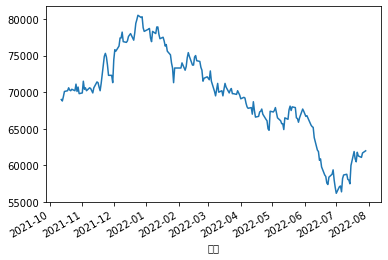

In [47]:
# 종가 그래프 출력(str)
df['종가'].plot();

### JSON 파싱
> 동적페이지 크롤링의 경우에는 일반적인 HTML text 형태의 데이터만을 사용하지 않습니다.  
JSON, xml 형식의 데이터도 통신에 사용하기에 요청결과값에 따른 처리가 필요합니다.

### 다음 주식 일자별 주가 데이터 크롤링 연습

In [50]:
url='https://finance.daum.net/api/quote/A005930/times?symbolCode=A005930&page=2&perPage=10&pagination=true'
# requests 요청시에 헤더정보 추가
header={
    'referer' : 'https://finance.daum.net/quotes/A005930',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    
}    
resp=requests.get(url, headers=header)
# html 변환
html=BeautifulSoup(resp.text, 'html.parser')
 )
# df


In [51]:
resp.text

'{"data":[{"symbolCode":null,"date":"2022-07-29 13:15:59","tradePrice":61800.0,"tradeTime":"13:15:59","change":"FALL","changePrice":-100.0,"changeRate":-0.0016155089,"prevClosingPrice":61900.0,"openingPrice":61800.0,"highPrice":61900.0,"lowPrice":61800.0,"accTradePrice":493204796400,"accTradeVolume":7938166,"periodTradePrice":408724600,"periodTradeVolume":6610,"askTradePrice":null,"bidTradePrice":null},{"symbolCode":null,"date":"2022-07-29 13:14:59","tradePrice":61800.0,"tradeTime":"13:14:59","change":"FALL","changePrice":-100.0,"changeRate":-0.0016155089,"prevClosingPrice":61900.0,"openingPrice":61800.0,"highPrice":61900.0,"lowPrice":61800.0,"accTradePrice":492796071800,"accTradeVolume":7931556,"periodTradePrice":396409900,"periodTradeVolume":6411,"askTradePrice":null,"bidTradePrice":null},{"symbolCode":null,"date":"2022-07-29 13:13:59","tradePrice":61900.0,"tradeTime":"13:13:59","change":"EVEN","changePrice":0.0,"changeRate":0,"prevClosingPrice":61900.0,"openingPrice":61900.0,"highPr

In [53]:
import json
data=json.loads(resp.text)

In [54]:
data

{'data': [{'symbolCode': None,
   'date': '2022-07-29 13:15:59',
   'tradePrice': 61800.0,
   'tradeTime': '13:15:59',
   'change': 'FALL',
   'changePrice': -100.0,
   'changeRate': -0.0016155089,
   'prevClosingPrice': 61900.0,
   'openingPrice': 61800.0,
   'highPrice': 61900.0,
   'lowPrice': 61800.0,
   'accTradePrice': 493204796400,
   'accTradeVolume': 7938166,
   'periodTradePrice': 408724600,
   'periodTradeVolume': 6610,
   'askTradePrice': None,
   'bidTradePrice': None},
  {'symbolCode': None,
   'date': '2022-07-29 13:14:59',
   'tradePrice': 61800.0,
   'tradeTime': '13:14:59',
   'change': 'FALL',
   'changePrice': -100.0,
   'changeRate': -0.0016155089,
   'prevClosingPrice': 61900.0,
   'openingPrice': 61800.0,
   'highPrice': 61900.0,
   'lowPrice': 61800.0,
   'accTradePrice': 492796071800,
   'accTradeVolume': 7931556,
   'periodTradePrice': 396409900,
   'periodTradeVolume': 6411,
   'askTradePrice': None,
   'bidTradePrice': None},
  {'symbolCode': None,
   'date'

In [55]:
df=pd.DataFrame(data['data'])
df

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,askTradePrice,bidTradePrice
0,None,2022-07-29 13:15:59,61800.0,13:15:59,FALL,-100.0,-0.001616,61900.0,61800.0,61900.0,61800.0,493204796400,7938166,408724600,6610,None,None
1,None,2022-07-29 13:14:59,61800.0,13:14:59,FALL,-100.0,-0.001616,61900.0,61800.0,61900.0,61800.0,492796071800,7931556,396409900,6411,None,None
2,None,2022-07-29 13:13:59,61900.0,13:13:59,EVEN,0.0,0.000000,61900.0,61900.0,61900.0,61800.0,492399661900,7925145,470271300,7604,None,None
3,None,2022-07-29 13:12:59,61900.0,13:12:59,EVEN,0.0,0.000000,61900.0,61800.0,61900.0,61800.0,491929390600,7917541,908014100,14677,None,None
4,None,2022-07-29 13:11:59,61800.0,13:11:59,FALL,-100.0,-0.001616,61900.0,61800.0,61900.0,61800.0,491021376500,7902864,535090100,8653,None,None
5,None,2022-07-29 13:10:59,61900.0,13:10:59,EVEN,0.0,0.000000,61900.0,61900.0,61900.0,61800.0,490486286400,7894211,493725500,7983,None,None
6,None,2022-07-29 13:09:59,61900.0,13:09:59,EVEN,0.0,0.000000,61900.0,61800.0,61900.0,61800.0,489992560900,7886228,349802500,5657,None,None
7,None,2022-07-29 13:08:59,61800.0,13:08:59,FALL,-100.0,-0.001616,61900.0,61900.0,61900.0,61800.0,489642758400,7880571,1150139900,18607,None,None
8,None,2022-07-29 13:07:59,61900.0,13:07:59,EVEN,0.0,0.000000,61900.0,61900.0,61900.0,61800.0,488492618500,7861964,265828100,4297,None,None
9,None,2022-07-29 13:06:58,61900.0,13:06:58,EVEN,0.0,0.000000,61900.0,61800.0,61900.0,61800.0,488226790400,7857667,319970500,5174,None,None


### 네이버 데이터랩 인기검색어 크롤링

In [60]:
# 동적페이지의 숨은 URL
# 동적페이지에 요청을 할 때 웹 정책에 필요한 정보를 같이 전달을 해줘야 함.

url ='https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000001'
#'https://datalab.naver.com/'
#

# requests 요청시에 헤더정보 추가
header={
   'referer' : 'https://datalab.naver.com/',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'
    
}
resp=requests.get(url, headers=header)
# html 변환
html=BeautifulSoup(resp.text, 'html.parser')
# 정보선별
html.select('span.title')
# # 날짜
# date= list()
# for item in range(10):
#     date.append(html.select('span.p10')[item].text)
# # 종가
# end=[]
# for item in range(10):
#     end.append(html.select('span.p10')[item].text)

# 한꺼번에
# alldata=[]
# for i in range(70):
#     alldata.append(html.select('span.tah')[i].text.replace('\n', '').replace('\t', ''))
# df 제작
#index=['코오롱인더', '삼성전자'],
# df = pd.DataFrame(np.array(alldata).reshape(-1, 7),
#                   columns=['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'],
#                  )
# df

[]

## APIs
> 어플리케이션  
웹 서비스 제공자가 사용자에게 정보를 제공하기 위한 통신프로그램  
일반적인 API의 경우 requests -> response 형태의 크롤링 방법과 동일한 형태를 취한다.  

### 네이버 파파고 API

In [87]:
c_id = 'GSwv9xaItLeoJV5VJGag'
pw='i7aqwrxXab'
url = 'https://openapi.naver.com/v1/papago/n2mt'

In [93]:
def ko_to_en(text):
    header={
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "X-Naver-Client-Id": c_id,
        "X-Naver-Client-Secret": pw

    }
    data={
        "source":"ko",
        "target":"en",
        "text": text
    }
    # get -> 헤더 정보 포함 요청방법
    # post -> 헤더정보 +데이터 요청 방법
    resp=requests.post(url, headers=header, data=data)
    papago= json.loads(resp.text)
    return papago['message']['result']['translatedText']

In [94]:
ko_to_en('안녕')

'Hi.'

In [95]:
def en_to_ko(text):
    header={
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "X-Naver-Client-Id": c_id,
        "X-Naver-Client-Secret": pw

    }
    data={
        "source":"en",
        "target":"ko",
        "text": text
    }
    # get -> 헤더 정보 포함 요청방법
    # post -> 헤더정보 +데이터 요청 방법
    resp=requests.post(url, headers=header, data=data)
    papago= json.loads(resp.text)
    return papago['message']['result']['translatedText']

In [96]:
en_to_ko('hi')

'안녕'

### 공공데이터 API

In [61]:
key1 ='5608247JXIxP56YLMZdZMCOgWU3MR%2FMcbUys0lEFDh4UGG8sX1PK%2FlcVDoR91ma50RoqvtQEzHh%2BN5H703gIuA%3D%3D'
key2 ='5608247JXIxP56YLMZdZMCOgWU3MR/McbUys0lEFDh4UGG8sX1PK/lcVDoR91ma50RoqvtQEzHh+N5H703gIuA==' 
url = 'http://apis.data.go.kr/3130000/openapi/sns/getsns'


In [65]:
import requests

url = 'http://apis.data.go.kr/3130000/openapi/sns/getsns'
params ={'serviceKey' : key2, 
         'type' : 'json', 
        }

resp = requests.get(url, params=params)
print(resp.text)

{"resultCode":"0","resultMsg":"SUCCESS","numOfRows":10,"pageNo":0,"totalCount":377,"items":[{"date":"2018-07-01","positive":"2956","negative":"648","neutral":"295","addr":"홍대 걷고 싶은 거리"},{"date":"2018-08-01","positive":"2247","negative":"111","neutral":"200","addr":"홍대 걷고 싶은 거리"},{"date":"2018-09-01","positive":"3602","negative":"635","neutral":"436","addr":"홍대 걷고 싶은 거리"},{"date":"2018-10-01","positive":"2827","negative":"394","neutral":"623","addr":"홍대 걷고 싶은 거리"},{"date":"2018-11-01","positive":"2004","negative":"356","neutral":"583","addr":"홍대 걷고 싶은 거리"},{"date":"2018-12-01","positive":"1457","negative":"223","neutral":"173","addr":"홍대 걷고 싶은 거리"},{"date":"2019-01-01","positive":"1444","negative":"143","neutral":"127","addr":"홍대 걷고 싶은 거리"},{"date":"2019-02-01","positive":"6886","negative":"215","neutral":"220","addr":"홍대 걷고 싶은 거리"},{"date":"2019-03-01","positive":"1945","negative":"175","neutral":"160","addr":"홍대 걷고 싶은 거리"},{"date":"2019-04-01","positive":"1773","negative":"90","neutra

In [66]:
data=json.loads(resp.text)

In [68]:

data['items']

[{'date': '2018-07-01',
  'positive': '2956',
  'negative': '648',
  'neutral': '295',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2018-08-01',
  'positive': '2247',
  'negative': '111',
  'neutral': '200',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2018-09-01',
  'positive': '3602',
  'negative': '635',
  'neutral': '436',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2018-10-01',
  'positive': '2827',
  'negative': '394',
  'neutral': '623',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2018-11-01',
  'positive': '2004',
  'negative': '356',
  'neutral': '583',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2018-12-01',
  'positive': '1457',
  'negative': '223',
  'neutral': '173',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2019-01-01',
  'positive': '1444',
  'negative': '143',
  'neutral': '127',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2019-02-01',
  'positive': '6886',
  'negative': '215',
  'neutral': '220',
  'addr': '홍대 걷고 싶은 거리'},
 {'date': '2019-03-01',
  'positive': '1945',
  'negative': '175',
  'neutral': '160',
  'addr':

In [69]:
df=pd.DataFrame(data['items'])
df

,date,positive,negative,neutral,addr
0,2018-07-01,2956,648,295,홍대 걷고 싶은 거리
1,2018-08-01,2247,111,200,홍대 걷고 싶은 거리
2,2018-09-01,3602,635,436,홍대 걷고 싶은 거리
3,2018-10-01,2827,394,623,홍대 걷고 싶은 거리
4,2018-11-01,2004,356,583,홍대 걷고 싶은 거리
5,2018-12-01,1457,223,173,홍대 걷고 싶은 거리
6,2019-01-01,1444,143,127,홍대 걷고 싶은 거리
7,2019-02-01,6886,215,220,홍대 걷고 싶은 거리
8,2019-03-01,1945,175,160,홍대 걷고 싶은 거리
9,2019-04-01,1773,90,103,홍대 걷고 싶은 거리


In [70]:
key1= '5608247JXIxP56YLMZdZMCOgWU3MR%2FMcbUys0lEFDh4UGG8sX1PK%2FlcVDoR91ma50RoqvtQEzHh%2BN5H703gIuA%3D%3D'
key2 = '5608247JXIxP56YLMZdZMCOgWU3MR/McbUys0lEFDh4UGG8sX1PK/lcVDoR91ma50RoqvtQEzHh+N5H703gIuA=='
url = 'http://apis.data.go.kr/1790387/covid19CurrentStatusKorea/covid19CurrentStatusKoreaJason'

In [83]:
import requests

url = 'http://apis.data.go.kr/1790387/covid19CurrentStatusKorea/covid19CurrentStatusKoreaJason'
params ={'serviceKey' : key2,
        }

response = requests.get(url, params=params)
data=json.loads(response.text)
data

{'response': {'resultMsg': '조회성공',
  'result': [{'rate_hospitalizations': '0.64',
    'rate_confirmations': '165.22',
    'cnt_severe_symptoms': '234',
    'cnt_deaths': '35',
    'rate_severe_symptoms': '0.45',
    'cnt_hospitalizations': '330',
    'cnt_confirmations': '85320',
    'mmddhh': '7.29.00시',
    'rate_deaths': '0.07'}],
  'resultCnt': '1',
  'resultCode': '1'}}